#                                                   NAME OF THE PROJECT</b> : INCOME PREDECTING MODEL

# DESCRIPTION OF THE PROJECT </B>: Classification model to predict whether a person makes over $50k a year

# CONTEXT </b>: This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics)


# Details of features</b>: The columns are described as follows:


1) Age
2) Workclass
3) Fnlwgt
4) Education
5) education_num
6) marital_status 
7) occupation 
8) relationship 
9) race 
10) sex 
11) capital_gain 
12) capital_loss 
13) hours_per_week
14) native_country
15) income

# 1) Understanding the data (exploring)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df = pd.read_csv('adult.csv')
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.shape

(32560, 15)

1) Renaming the columns

In [6]:
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [7]:
df.columns.values.tolist()

['39',
 ' State-gov',
 ' 77516',
 ' Bachelors',
 ' 13',
 ' Never-married',
 ' Adm-clerical',
 ' Not-in-family',
 ' White',
 ' Male',
 ' 2174',
 ' 0',
 ' 40',
 ' United-States',
 ' <=50K']

In [8]:
df.columns=['Age','Workclass','Fnlwgt','Education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']
df

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# 2) Removing handle null values (if any) and Visualizing Data

In [9]:
df.columns.values.tolist()


['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income']

In [10]:
df.describe()


,Age,Fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
df.isnull()

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [13]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_per_week       94
native_country       42
income                2
dtype: int64

In [14]:
df.describe()

,Age,Fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [22]:
print(df.dtypes)

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


In [25]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [32]:
numeric_df = df.select_dtypes(include=[float, int])

In [33]:
numeric_df.corr()

,Age,Fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


<Axes: >

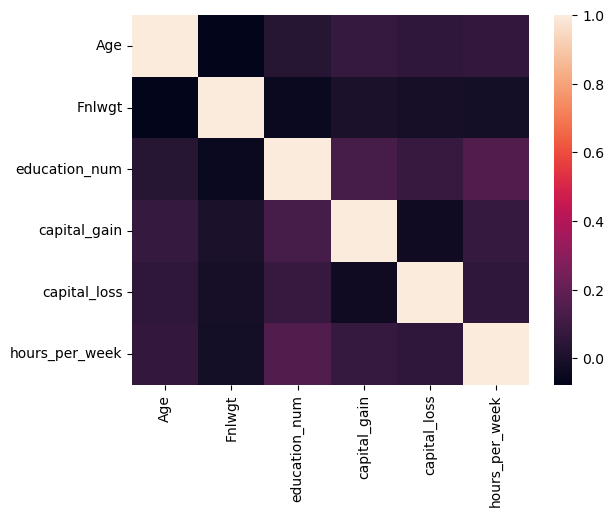

In [97]:
sns.heatmap(numeric_df.corr())

In [35]:
df['Workclass'].value_counts()

Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [36]:
df['occupation'].value_counts()

occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

In [37]:
df['native_country'].value_counts()

native_country
 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

In [38]:
df['sex'].value_counts()

sex
 Male      21789
 Female    10771
Name: count, dtype: int64

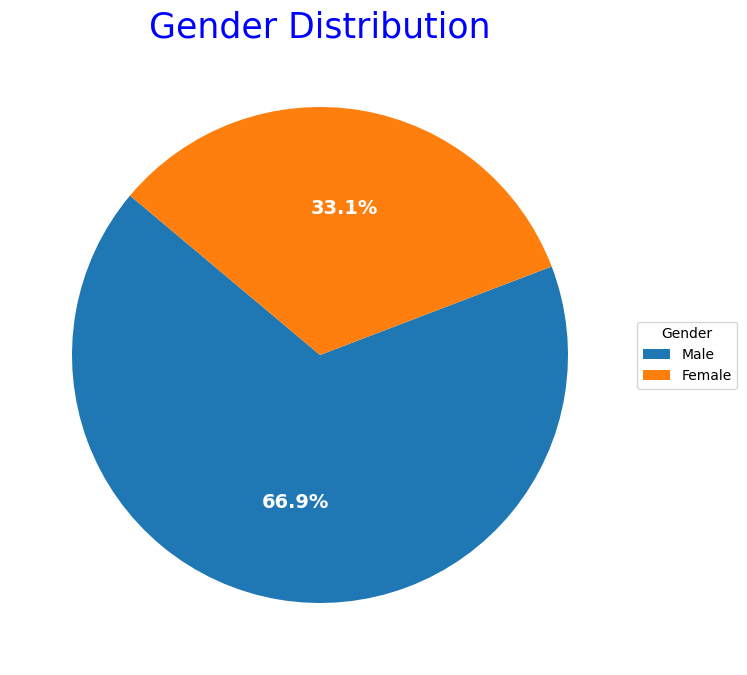

In [102]:
labels = ['Male', 'Female']
data = [21789, 10771]
colors = ['#1f77b4', '#ff7f0e']

fig, ax = plt.subplots(figsize=(8, 9))
wedges, texts, autotexts = ax.pie(data, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)

for text in texts + autotexts:
    text.set_fontsize(14)
    text.set_color('white')

for text in autotexts:
    text.set_weight('bold')

ax.legend(wedges, labels, title="Gender", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Gender Distribution', color='blue', fontsize=25)
plt.show()


In [39]:
df['income'].value_counts()

income
 <=50K    24719
 >50K      7841
Name: count, dtype: int64

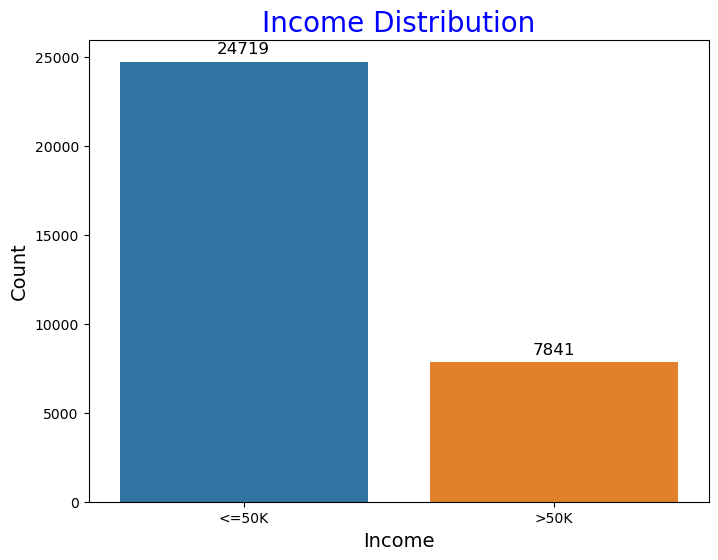

In [104]:

data = {'Income': ['<=50K', '>50K'], 'Count': [24719, 7841]}
df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='Income', y='Count', data=df, palette=['#1f77b4', '#ff7f0e'], ax=ax)

ax.set_title('Income Distribution', fontsize=20, color='blue')
ax.set_xlabel('Income', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9),
                textcoords='offset points', fontsize=12, color='black')

plt.show()


In [40]:
df.replace(to_replace ="?", 
                 value = "NaN", 
                  inplace = True)

In [41]:
df.head()


,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [44]:
df.ffill(inplace=True)

In [45]:
df.head(18)

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [46]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [48]:
print(le)

LabelEncoder()


In [49]:
df['Workclass']=le.fit_transform(df['Workclass'])
df['marital_status']=le.fit_transform(df['marital_status'])
df['occupation']=le.fit_transform(df['occupation'])
df['relationship']=le.fit_transform(df['relationship'])
df['race']=le.fit_transform(df['race'])
df['sex']=le.fit_transform(df['sex'])
df['native_country']=le.fit_transform(df['native_country'])
df['income']=le.fit_transform(df['income'])
df.head()

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,6,83311,Bachelors,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,HS-grad,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,11th,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,Bachelors,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,Masters,14,2,4,5,4,0,0,0,40,39,0


In [50]:
df.drop('Education',axis=1,inplace=True)

In [51]:
df.head() #dropped Education 

,Age,Workclass,Fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,6,83311,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,14,2,4,5,4,0,0,0,40,39,0


In [52]:
df.dtypes


Age               int64
Workclass         int32
Fnlwgt            int64
education_num     int64
marital_status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int32
income            int32
dtype: object

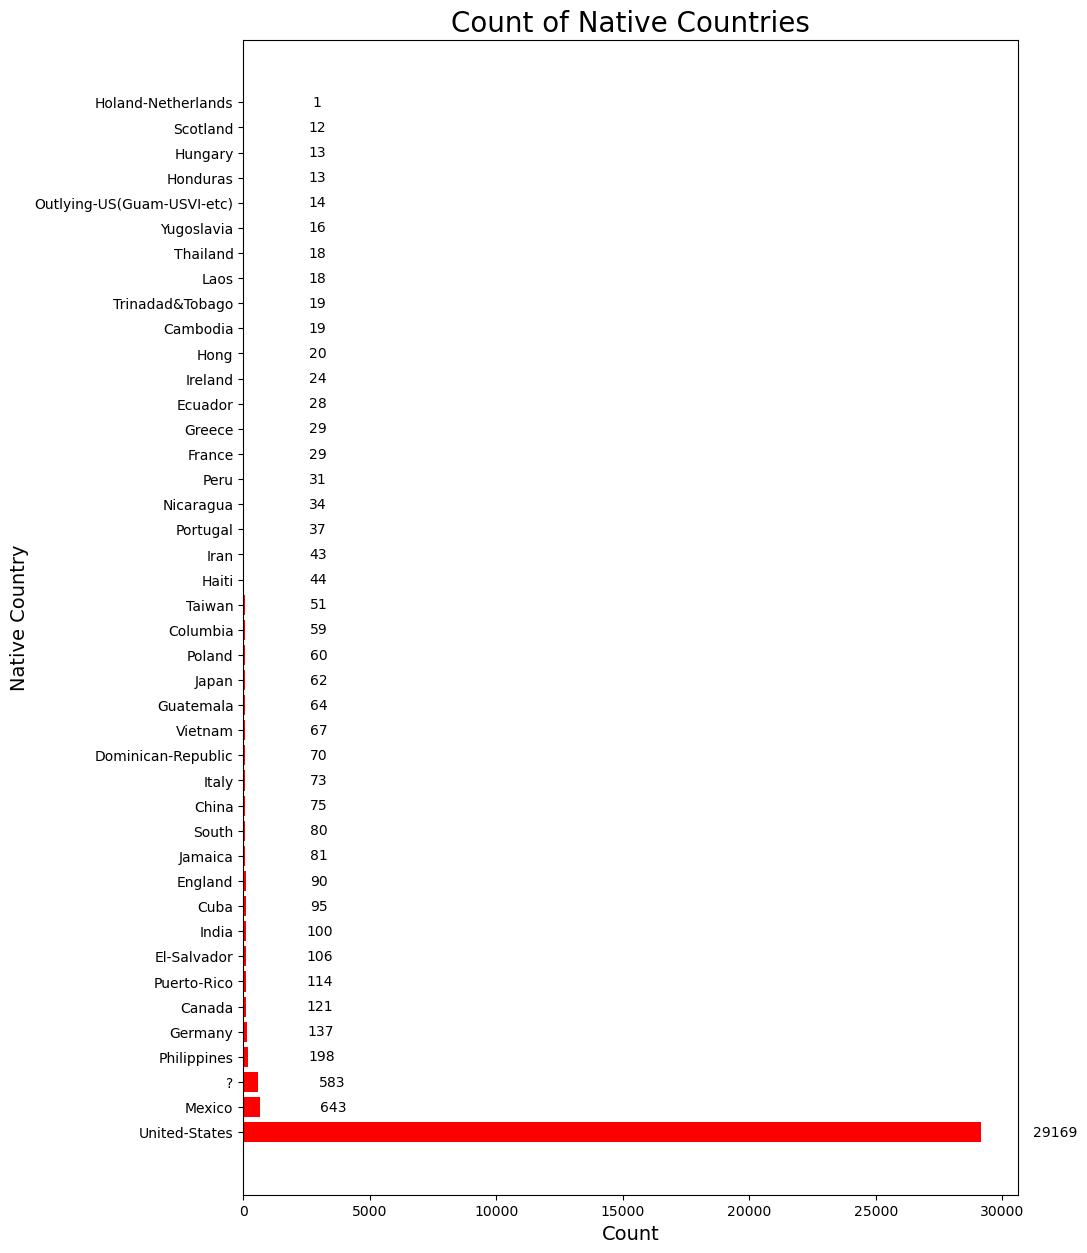

In [119]:
data = {
    'native_country': [
        'United-States', 'Mexico', '?', 'Philippines', 'Germany', 'Canada', 'Puerto-Rico', 'El-Salvador', 'India', 'Cuba',
        'England', 'Jamaica', 'South', 'China', 'Italy', 'Dominican-Republic', 'Vietnam', 'Guatemala', 'Japan', 'Poland',
        'Columbia', 'Taiwan', 'Haiti', 'Iran', 'Portugal', 'Nicaragua', 'Peru', 'France', 'Greece', 'Ecuador', 'Ireland',
        'Hong', 'Cambodia', 'Trinadad&Tobago', 'Laos', 'Thailand', 'Yugoslavia', 'Outlying-US(Guam-USVI-etc)', 'Honduras',
        'Hungary', 'Scotland', 'Holand-Netherlands'
    ],
    'count': [
        29169, 643, 583, 198, 137, 121, 114, 106, 100, 95, 90, 81, 80, 75, 73, 70, 67, 64, 62, 60, 59, 51, 44, 43, 37, 34,
        31, 29, 29, 28, 24, 20, 19, 19, 18, 18, 16, 14, 13, 13, 12, 1
    ]
}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(10, 15))
bars = ax.barh(df['native_country'], df['count'], color='red')

ax.set_title('Count of Native Countries', fontsize=20)
ax.set_xlabel('Count', fontsize=14)
ax.set_ylabel('Native Country', fontsize=14)

# Calculate offset based on bar width
offset = 0.1 * bars[0].get_width()  # Adjust offset percentage as needed

for bar in bars:
    width = bar.get_width()
    ax.text(width + offset, bar.get_y() + bar.get_height() / 2, f'{width:.0f}',  # Format to integer
            ha='center', va='center', color='black', fontsize=10)
plt.show()


# 3)Spliting data into training and test data

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x = df.iloc[:,:-1]   #independent values
y = df.iloc[:,-1]    #dependent values
print(x.shape)
print(y.shape)      
print(type(x))
print(type(y))

(32560, 13)
(32560,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [55]:
x.head()

,Age,Workclass,Fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,50,6,83311,13,2,4,0,4,1,0,0,13,39
1,38,4,215646,9,0,6,1,4,1,0,0,40,39
2,53,4,234721,7,2,6,0,2,1,0,0,40,39
3,28,4,338409,13,2,10,5,2,0,0,0,40,5
4,37,4,284582,14,2,4,5,4,0,0,0,40,39


In [56]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int32

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y)  
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
(24420, 13)

(24420, 13)
(8140, 13)
(24420,)
(8140,)


(24420, 13)

Decision Tree classifier </b>:


In [58]:
from sklearn.tree import DecisionTreeClassifier


In [59]:
m1 = DecisionTreeClassifier(criterion='gini',max_depth=19)   #taking max_depth as an optional parameters
m1.fit(x_train,y_train)   #m1=model one

DecisionTreeClassifier(max_depth=19)

In [60]:
print('Training Score',m1.score(x_train,y_train))                 
print('Testing Score',m1.score(x_test,y_test))  

Training Score 0.9502047502047503
Testing Score 0.8318181818181818


In [61]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1) 

[1 0 0 ... 0 0 0]


In [62]:
from sklearn.metrics import confusion_matrix,classification_report


In [63]:
cm_m1=confusion_matrix(y_test,ypred_m1)
print(cm_m1)        #[TN FP / FN TP]

[[5558  630]
 [ 739 1213]]


In [64]:
print(classification_report(y_test,ypred_m1))


              precision    recall  f1-score   support

           0       0.88      0.90      0.89      6188
           1       0.66      0.62      0.64      1952

    accuracy                           0.83      8140
   macro avg       0.77      0.76      0.76      8140
weighted avg       0.83      0.83      0.83      8140



In [65]:
TN=5471
FP=686
FN=755
TP=1228
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1_Score = 2*(precision*recall) / (precision+recall)
Accuracy = (TP+TN) / (TN+FP+FN+TP)
print(precision)
print(recall)
print(F1_Score)
print(Accuracy)

0.6415882967607106
0.6192637418053455
0.6302283808057482
0.822972972972973


In [66]:
Missclassification = -(Accuracy-1)
print(Missclassification*100)

17.702702702702698


Random Forest classifier </b>:


In [68]:
from sklearn.ensemble import RandomForestClassifier


In [69]:
m2 = RandomForestClassifier(n_estimators=80,criterion='entropy',max_depth=18,min_samples_split=10)
m2.fit(x_train,y_train)     #m2=model 2

RandomForestClassifier(criterion='entropy', max_depth=18, min_samples_split=10,
                       n_estimators=80)

In [70]:
print('Training Score',m2.score(x_train,y_train))
print('Testing Score',m2.score(x_test,y_test))

Training Score 0.9059377559377559
Testing Score 0.8737100737100737


In [71]:
ypred_m2 = m2.predict(x_test)
print(ypred_m2)

[1 0 0 ... 1 0 0]


In [72]:
from sklearn.metrics import confusion_matrix,classification_report


In [73]:
cm_m2 = confusion_matrix(y_test,ypred_m2)
print(cm_m2)

[[5872  316]
 [ 712 1240]]


In [74]:
print(classification_report(y_test,ypred_m2))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      6188
           1       0.80      0.64      0.71      1952

    accuracy                           0.87      8140
   macro avg       0.84      0.79      0.81      8140
weighted avg       0.87      0.87      0.87      8140



In [75]:
TN=5842
FP=315
FN=787
TP=1196
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1_Score = 2*(precision*recall) / (precision+recall)
Accuracy = (TP+TN) / (TN+FP+FN+TP)
print(precision)
print(recall)
print(F1_Score)
print(Accuracy)

0.7915287888815354
0.6031265758951084
0.6846021751574128
0.8646191646191647


In [76]:
Missclassification = -(Accuracy-1)
print(Missclassification*100)

13.538083538083534


Logistic regression</b> :


In [77]:
from sklearn.linear_model import LogisticRegression


In [78]:
m3=LogisticRegression(solver='liblinear') #here solver is used to train on larger datasets 
m3.fit(x_train,y_train)   #model 3

LogisticRegression(solver='liblinear')

In [79]:
print('Traning score',m3.score(x_train,y_train))
print('Testing Score',m3.score(x_test,y_test))

Traning score 0.7863636363636364
Testing Score 0.7932432432432432


In [80]:
ypred_m3 = m3.predict(x_test)
print(ypred_m3)

[0 0 0 ... 0 0 0]


In [81]:
cm_m3 = confusion_matrix(y_test,ypred_m3)
print(cm_m3)

[[5832  356]
 [1327  625]]


In [82]:
print(classification_report(y_test,ypred_m3))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      6188
           1       0.64      0.32      0.43      1952

    accuracy                           0.79      8140
   macro avg       0.73      0.63      0.65      8140
weighted avg       0.77      0.79      0.77      8140



In [83]:
TN=5958
FP=199
FN=1428
TP=555
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1_Score = 2*(precision*recall) / (precision+recall)
Accuracy = (TP+TN) / (TN+FP+FN+TP)
print(precision)
print(recall)
print(F1_Score)
print(Accuracy)

0.7360742705570292
0.27987897125567324
0.4055535257581294
0.8001228501228501


In [84]:
Missclassification = -(Accuracy-1)
print(Missclassification*100)

19.987714987714988


KNN Classifier</b>:


In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
m4 = KNeighborsClassifier(n_neighbors=90)  #m4 model number 4
m4.fit(x_train,y_train)   #model 4

KNeighborsClassifier(n_neighbors=90)

In [87]:
print('Traning score',m4.score(x_train,y_train))
print('Testing Score',m4.score(x_test,y_test))

Traning score 0.7856674856674857
Testing Score 0.7910319410319411


In [88]:
ypred_m4 = m4.predict(x_test)
print(ypred_m4)

[0 0 0 ... 0 0 0]


In [89]:
cm_m4 = confusion_matrix(y_test,ypred_m3)
print(cm_m4)

[[5832  356]
 [1327  625]]


In [90]:
print(classification_report(y_test,ypred_m4))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      6188
           1       0.98      0.13      0.23      1952

    accuracy                           0.79      8140
   macro avg       0.88      0.57      0.56      8140
weighted avg       0.83      0.79      0.72      8140



TN=6151
FP=6
FN=1735
TP=248
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1_Score = 2*(precision*recall) / (precision+recall)
Accuracy = (TP+TN) / (TN+FP+FN+TP)
print(precision)
print(recall)
print(F1_Score)
print(Accuracy)

In [92]:
Missclassification = -(Accuracy-1)
print(Missclassification*100)

21.388206388206388


CONCLUSION :


ACCURACY of each model 
M1 = 0.82  #Desicion tree
M2 = 0.86  #Random forest
M3 = 0.80  #Logistic regression
M4 = 0.78  #KNN classifier

Report</b> :

RANDOM FOREST HAS BEST ACCURACY COMPARED TO THE OTHER MODELS